

# Predicting Cardiovascular Disease 

### Project Overview: 

**The Problem**
Cardiovascular Heart Disease (CHD) is the leading cause of death annually worldwide. Cardiovascular Diseases can, however, be managed if caught early and simple lifestyle changes are made. This project would explore a set of data for patients measuring known factors for heart disease to develop a machine learning model to predict risk of developing heart disease within the next ten years. 


**The Client:**
A small clinic in Framingham, Massachusetts has seen a decided spike in cases of cardiovascular disease in their patients. Rather than sit back and wait for illness to strike, the lead cardiologist has decided to be proactive. They’ve reached out to us to review their clinical data and develop a model to predict their patient’s risk of developing cardiovascular disease in the next 10 years. The physician has two goals in mind: help identify those at risk and start acting before things get worse, and determine which patients are statistically more likely to develop problems and provide them with educational material before things become a problem. The model developed from their patient dataset will be used to do exactly that. A statistical model will be used to develop a patient education program, targeted at specific potential risk patients, and to help bring awareness surrounding cardiovascular disease before it becomes a problem. A machine learning model will also be used to target identified “at risk” patients and help them combat more severe cardiovascular disease by targeting treatment and making recommended life-style changes for those patients who are identified as being at risk.


# Exploratory Data Analysis

Let's begin by importing and cleaning the data. Then we will generate some basic scatter plots to explore the information in the dataset. 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy 


In [2]:
#Watermark for future references on packages used to complete project 
%load_ext watermark
%watermark -a "Caitlin Jansson" -d -t -v -p numpy,pandas,matplotlib,seaborn
# -g # adds Git Hash

Author: Caitlin Jansson

Python implementation: CPython
Python version       : 3.7.1
IPython version      : 7.2.0

numpy     : 1.19.2
pandas    : 1.1.3
matplotlib: 2.2.4
seaborn   : 0.9.0



In [3]:
#Import Data for Cleaning
#File Names
trainfile = 'data/train.csv'
testfile = 'data/test.csv'


#Import Files
train_original = pd.read_csv(trainfile)
test_original = pd.read_csv(testfile) 

In [4]:
train_original.head(6)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [5]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
test_original.head(6)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
5,3395,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0


In [7]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB




As expected, the train set has 1 column that the test set does not include. This column is for training the models, and is called TenYearCHD-it is a set of binary values to define if a patient has a risk of developing CHD in the next 10 years. The value 1 is assigned for "yes" there is a risk of developing CHD and 0 for "no" risk of developing CHD.


Other differences are- again expected - with the test dataset being approximately 20% of the total data when combining both dataframes. 


Let's go ahead and combine the dataframes to begin our data wrangling and exploration. We'll fill the missing values of the test set with a 2 to maintain the integer type of the data, and allow us to easily filter out the test set later. This will allow any values in the train set to be kept distinct if they're nulls. This is unlikely, but its best to be safe.


In [8]:
#Combine Data sets

#Add blank 'Adoption Speed' column to test
test_original['TenYearCHD'] = 2

#Combine Data Sets
data = pd.concat([train_original,test_original],axis=0, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       4238 non-null   int64  
dtypes: float64(9),

In [9]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,2
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,2
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,2
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,2


In [10]:
list(data.columns)

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [11]:
#Create a function to convert column values to a 
#DataFrame showing a count of each unique value, including nulls

def column_to_df (df_column, column_name):
    #Create dataframe by shorting values, including nulls, then resent index to make 2 columns
    df_final = pd.DataFrame(df_column.value_counts(dropna=False)).reset_index()
    
    #Rename Columns
    df_final.columns = ['Value','Count']
    
    #Return Name of Variable and DataFrame
    print (column_name, '\n', df_final)   



The dataframe contains three types of data: Demographic, Behavioral, and Medical (including medical history and current medical state). The features that fall into each are as below:

 -  Demographic 
     - Age
     - Education Level
     - Sex
 -  Behavioral
     - is_smoking
     - cigsPerDay)
 -  Medical
     - Medical History: 
         - BPMeds
         - prevalentStroke 
         - prevalentHyp 
     - Current Medical State: 
         - diabetes
         - totChol
         - sysBP
         - dialBP
         - BMI
         - heartRate
         - glucose
         - TenYearCHD
         
Let's now investigate each feature further to see what data each contains.


Text(0.5,1,'Number of Patients at Each Age')

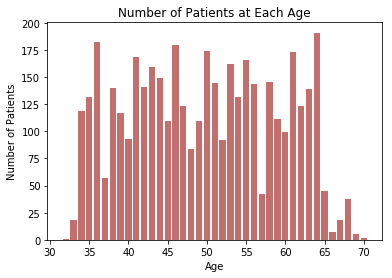

In [12]:
#See the distribution of ages and verify all of them make sense
age_unique = data['age'].unique()
age_counts = data['age'].value_counts()

#Plot ages in series vs count of each
plt.bar(age_unique, age_counts, color='#c26f6d')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Number of Patients at Each Age")

In [13]:
#Display sorted ages to determine if there are any null values
age_nulls = data.age.isna().value_counts()
age_nulls

False    4238
Name: age, dtype: int64

In [14]:
#Show Dataframe for Education
column_to_df (data.education, 'Education Values')

Education Values 
    Value  Count
0    1.0   1720
1    2.0   1253
2    3.0    687
3    4.0    473
4    NaN    105


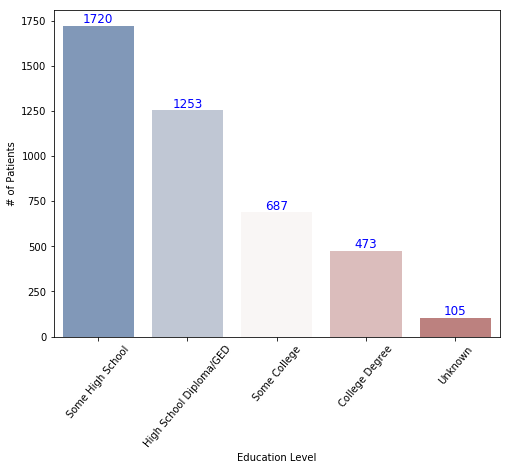

In [15]:
#Create Plot for Education Dataframe
#Define x-axis labels
edu_lvl = ['Some High School', 'High School Diploma/GED', 'Some College', 'College Degree', 'Unknown']

#Fill NA values in Education Column
edu = data.copy()
edu.education = edu.education.fillna(value=5)

#Create Figure 
fig, ax = plt.subplots(figsize = (8, 6))

#Create Plot
ax = sns.countplot (x='education', data = edu, palette= 'vlag')
ax.set(xlabel='Education Level', ylabel='# of Patients')
ax.set_xticklabels(edu_lvl, rotation = 50)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

#save plot as image
plt.savefig(r'images/distpatients_educationlvl.png', dpi=400)

In [16]:
#Verify the sex column only contains Male/Female data and distribution of each
#Show Dataframe for gender
column_to_df (data.sex, 'Gender Values')

Gender Values 
   Value  Count
0     F   2419
1     M   1819


In [17]:
#Investigate the "is_smoking" Feature
column_to_df (data.is_smoking, "Is_smoking Count")

Is_smoking Count 
   Value  Count
0    NO   2144
1   YES   2094


In [18]:
#Investigate cigarettes per day
column_to_df (data.cigsPerDay, "Cigarettes Per Day Count")

Cigarettes Per Day Count 
     Value  Count
0     0.0   2144
1    20.0    734
2    30.0    217
3    15.0    210
4    10.0    143
5     9.0    130
6     5.0    121
7     3.0    100
8    40.0     80
9     1.0     67
10   43.0     56
11   25.0     55
12    NaN     29
13   35.0     22
14    6.0     18
15    2.0     18
16    7.0     12
17    8.0     11
18   60.0     11
19    4.0      9
20   18.0      8
21   17.0      7
22   23.0      6
23   50.0      6
24   11.0      5
25   45.0      3
26   12.0      3
27   13.0      3
28   16.0      3
29   19.0      2
30   14.0      2
31   70.0      1
32   29.0      1
33   38.0      1


Text(0.5,1,'Number of Cigarettes Smoked Per Day- Only Smokers')

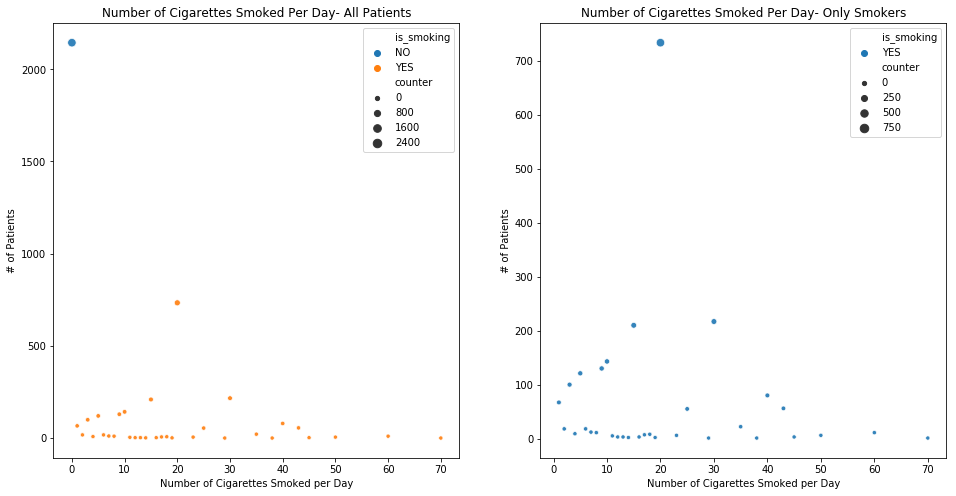

In [19]:
#Create a Plot of Cigarettes per day and whether a patient smokes
#Define Dataframe by copying original, dropping null values, creating a blank entry, grouping, and resetting index
df_smoking = data[['is_smoking','cigsPerDay']].copy()
df_smoking.cigsPerDay = df_smoking.cigsPerDay.dropna()
df_smoking['counter'] = 1
dfsmkplt = df_smoking.groupby(['cigsPerDay','is_smoking']).count().reset_index()

#Create frame without smokers

dfsmkplt_ns =dfsmkplt[dfsmkplt.is_smoking == 'YES']

#Create Figure 
fig, ax = plt.subplots(figsize = (16, 8))

#Create Plot
plt.subplot(1,2,1)
ax = sns.scatterplot(x=dfsmkplt.cigsPerDay, y=dfsmkplt.counter, hue=dfsmkplt.is_smoking, 
                size=dfsmkplt.counter, alpha=0.9)
ax.set(xlabel='Number of Cigarettes Smoked per Day', ylabel='# of Patients')
plt.title('Number of Cigarettes Smoked Per Day- All Patients')



plt.subplot(1,2,2)
ax1=sns.scatterplot(x=dfsmkplt_ns.cigsPerDay, y=dfsmkplt_ns.counter, hue=dfsmkplt_ns.is_smoking, 
                size=dfsmkplt_ns.counter, alpha=0.9)
ax1.set(xlabel='Number of Cigarettes Smoked per Day', ylabel='# of Patients')
plt.title('Number of Cigarettes Smoked Per Day- Only Smokers')


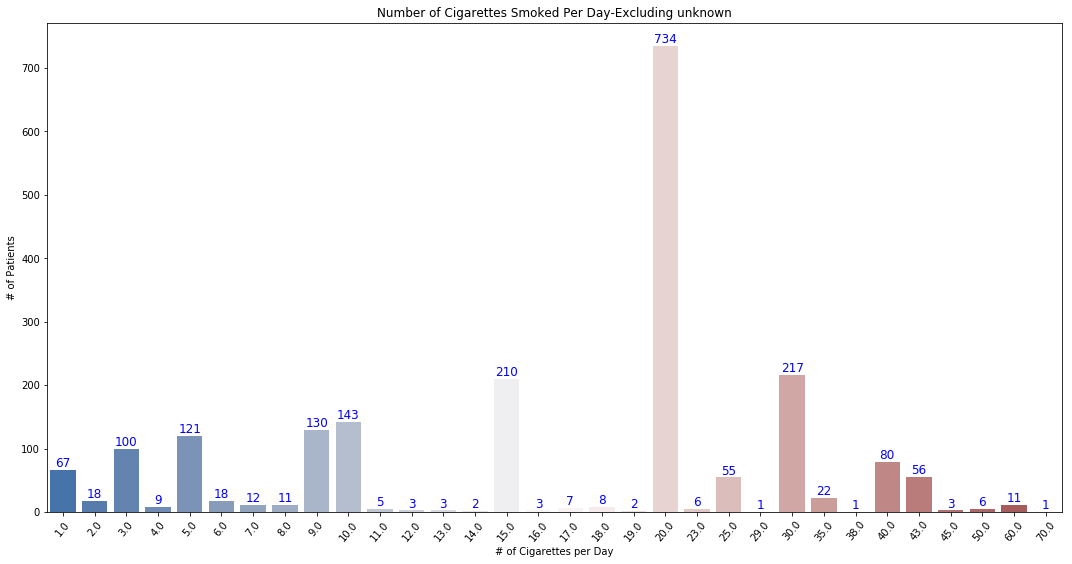

In [20]:
#Create bar plot for amount of cigarettes smoked per day

#Fill Null Values in Data
smkg = data[data.is_smoking=='YES']

#Create Figure 
fig, ax = plt.subplots(figsize = (40, 9))

#Create Plot
plt.subplot(1,2,1)
ax = sns.countplot(x='cigsPerDay', data=smkg, palette='vlag')
ax.set(xlabel='# of Cigarettes per Day', ylabel='# of Patients')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)
plt.title('Number of Cigarettes Smoked Per Day-Excluding unknown')



for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='bottom')

    #save plot as image
plt.savefig(r'images/cigs_per_day_distribution.png', dpi=400)

In [21]:
column_to_df(data.BPMeds, "Blood Pressure Meds Count")

Blood Pressure Meds Count 
    Value  Count
0    0.0   4061
1    1.0    124
2    NaN     53


In [22]:
column_to_df(data.prevalentStroke, "Prevalence of Stroke")

Prevalence of Stroke 
    Value  Count
0      0   4213
1      1     25


In [23]:
column_to_df(data.prevalentHyp, "Prevalence of Hypertension")

Prevalence of Hypertension 
    Value  Count
0      0   2922
1      1   1316


In [24]:
column_to_df(data.diabetes, "Does Patient have Diabetes")

Does Patient have Diabetes 
    Value  Count
0      0   4129
1      1    109


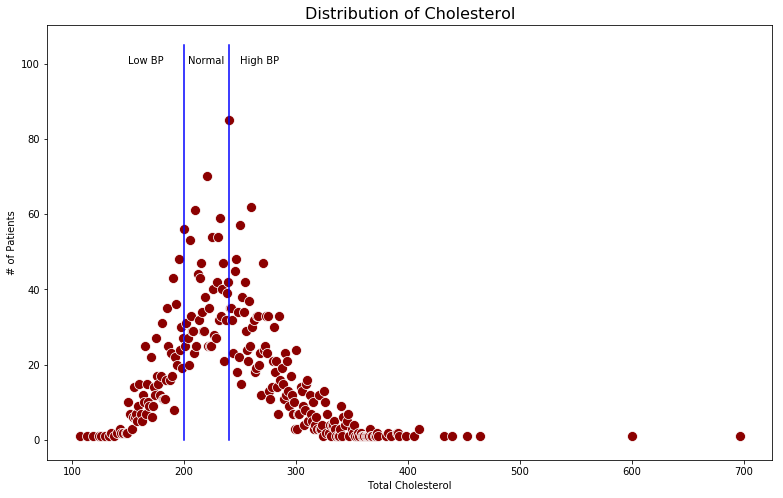

In [25]:
#Create Plot for Cholesterol Values 
#Create dataframe by shorting values, including nulls, then resent index to make 2 columns
chol_counts = pd.DataFrame(data.totChol.value_counts()).reset_index()

#Rename Columns, sort by cholesterol value
chol_counts.columns = ['Cholesterol','NoPts']    
chol = chol_counts.sort_values('Cholesterol')

#Create Plot of Cholesterols
fig, ax = plt.subplots(figsize = (13, 8))
ax = sns.scatterplot('Cholesterol','NoPts', data= chol, color='darkred',s=100)
ax.set(xlabel='Total Cholesterol', ylabel='# of Patients')
plt.title('Distribution of Cholesterol',fontsize=16)

#Annotate Normal Ranges 
plt.plot([200,200],[0,105],color='blue')
ax.annotate('Low BP', xy=(150,100))
ax.annotate('Normal', xy=(203,100))
plt.plot([240,240],[0,105],color='blue')
ax.annotate('High BP', xy=(250,100))

#save plot as image
plt.savefig(r'images/cholesterol_distribution.png', dpi=400)

In [26]:
#Update dataframe to include counter column for use in groupby statements
data_counter = data.copy()
data_counter['Counter']=0

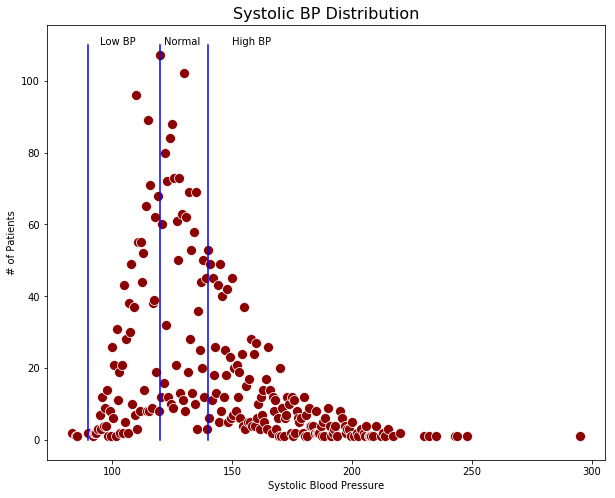

In [27]:
#Generate counter Dataframe for systolic BP
sys_counted = data_counter.groupby('sysBP').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('sysBP','Counter', data= sys_counted, color='darkred',s=100)
ax.set(xlabel='Systolic Blood Pressure', ylabel='# of Patients')
plt.title('Systolic BP Distribution',fontsize=16)


#Annotate Normal Ranges 
plt.plot([90,90],[0,110],color='blue')
ax.annotate('Low BP', xy=(95,110))
plt.plot([120,120],[0,110],color='blue')
ax.annotate('Normal', xy=(121.5,110))
plt.plot([140,140],[0,110],color='blue')
ax.annotate('High BP', xy=(150,110))


#save plot as image
plt.savefig(r'images/sysBP_dist.png', dpi=400)

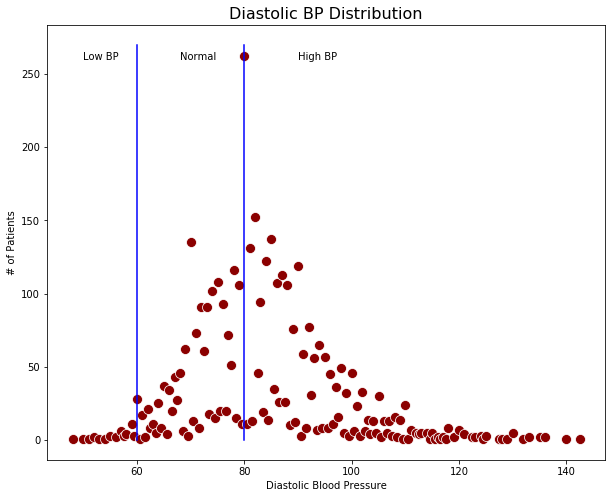

In [28]:
#Generate counter Dataframe for Diastolic BP
dia_counted = data_counter.groupby('diaBP').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('diaBP','Counter', data= dia_counted, color='darkred',s=100)
ax.set(xlabel='Diastolic Blood Pressure', ylabel='# of Patients')
plt.title('Diastolic BP Distribution',fontsize=16)

#Annotate Normal Ranges 
plt.plot([80,80],[0,270],color='blue')
ax.annotate('Normal', xy=(68,260))
ax.annotate('High BP', xy=(90,260))
plt.plot([60,60],[0,270],color='blue')
ax.annotate('Low BP', xy=(50,260))


#save plot as image
plt.savefig(r'images/diaBP_distribution.png', dpi=400)

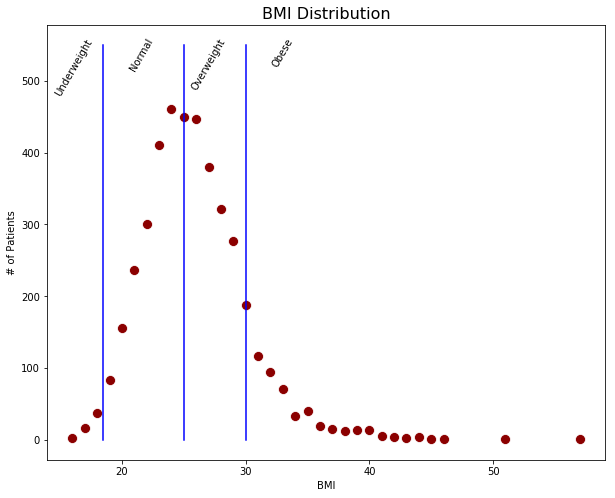

In [29]:
#Generate counter Dataframe for BMI
#Round BMI to whole number
BMI_round = data_counter.BMI.round(0)
data_BMI = data_counter.copy()
data_BMI['BMI'] = BMI_round

#Groupby to generate # of patients at each BMI
BMI_counted = data_BMI.groupby('BMI').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('BMI','Counter', data= BMI_counted, color='darkred',s=100)
ax.set(xlabel='BMI', ylabel='# of Patients')
plt.title('BMI Distribution',fontsize=16)


#Annotate Normal Ranges 
plt.plot([18.5,18.5],[0,550],color='blue')
ax.annotate('Underweight', xy=(14.5,550), rotation=60)
plt.plot([25,25],[0,550],color='blue')
ax.annotate('Normal', xy=(20.5,550), rotation=60)
plt.plot([30,30],[0,550],color='blue')
ax.annotate('Overweight', xy=(25.5,550), rotation=60)
ax.annotate('Obese', xy=(32,550), rotation=60)

#save plot as image
plt.savefig(r'images/BMI_distribution.png', dpi=400)

In [30]:
data_BMI= data_counter.copy()
data_BMI = data_BMI.BMI.round(0)
data_BMI

0        NaN
1       30.0
2       20.0
3       28.0
4       26.0
        ... 
4233    27.0
4234    23.0
4235    26.0
4236    23.0
4237    23.0
Name: BMI, Length: 4238, dtype: float64

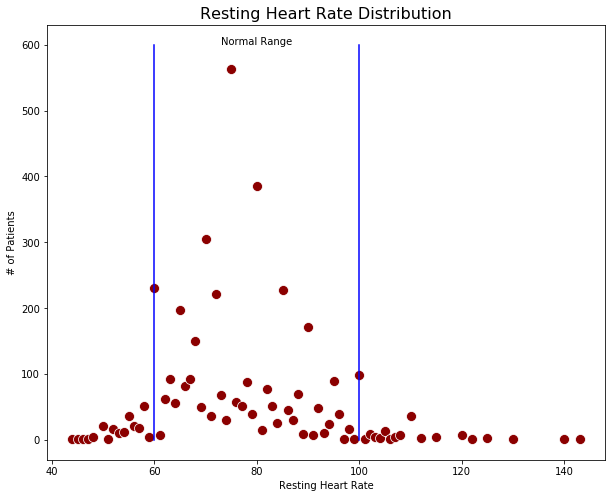

In [31]:
#Generate counter Dataframe for Resting Heart Rate
bpm = data_counter.groupby('heartRate').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('heartRate','Counter', data= bpm, color='darkred',s=100)
ax.set(xlabel='Resting Heart Rate', ylabel='# of Patients')
plt.title('Resting Heart Rate Distribution',fontsize=16)

#Add Range annotations
plt.plot([60,60],[0,600],color='blue')
plt.plot([100,100],[0,600],color='blue')
ax.annotate('Normal Range', xy=(73,600))

#save plot as image
plt.savefig(r'images/heart_rate_distribution.png', dpi=400)

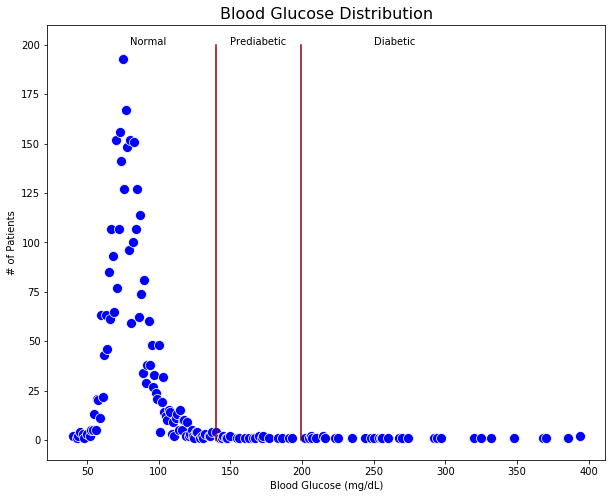

In [32]:
#Generate counter Dataframe for Blood Glucose
sugar_counted = data_counter.groupby('glucose').count().reset_index()

#Create Plot of Systolic BP
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot('glucose','Counter', data= sugar_counted, color='blue',s=100)
ax.set(xlabel='Blood Glucose (mg/dL)', ylabel='# of Patients')
plt.title('Blood Glucose Distribution',fontsize=16)

#Add Range annotations
plt.plot([140,140],[0,200],color='darkred')
ax.annotate('Normal',xy=(80,200))
plt.plot([199,199],[0,200],color='darkred')
ax.annotate('Prediabetic', xy=(150,200))
ax.annotate('Diabetic', xy=(250,200))

#save plot as image
plt.savefig(r'images/glucose_distribution.png', dpi=400)

In [33]:
# Create a dataframe to convert any discrete data points that are values to booleans
data_booleans = data.copy()
data_booleans['sex'] = data_booleans.sex.map(dict(M = 0, F = 1)) 
data_booleans['is_smoking'] = data_booleans.is_smoking.map(dict(YES = 1, NO = 0))

data_booleans.to_csv(r'tidy_data/data_booleans_combined.csv',index=False)

In [34]:
data_booleans.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Now, to summarize what we've learned about each feature: 

| Feature | Values | Continuous/Discrete| Amount of Nulls|Description|
| --- | --- | ---|---|---|
|Age| 32-70 | Continuous | None | Patient age in years, only whole numbers| 
|Education | 1, 2, 3, 4 | Discrete| None | Education Level: 1-Some High School, 2-High School Diploma/GED, 3-College, 4-Degree
|Sex| M, F| Discrete | None| Patient gender (M/F or 0=M, 1=F)|
|is_smoking| Yes, No | Discrete | None | If the patient is a current smoker (Yes/No or 1=yes, 0=no)|
|Cigs per Day| 0-70 | Continuous | 29 | Number of Cigarettes smoked per day (null = unknown)| 
|BP Meds| 0, 1 | Discrete | 53 |Whether the patient is taking Blood Pressure Medications (0=no, 1=yes, null=unknown|
|prevalentStroke | 0, 1 | Discrete | None | Prevalence of stroke (0=none, 1=has had occurences of stroke)|
|prevalentHyp | 0, 1 | Discrete | None | Prevalence of hypertension (0=none, 1= has prevalence hypertension|
|diabetes | 0, 1 |Discrete | None | If the patient has diabetes (0=no, 1=yes)|
|totChol|107-696 | Continuous |50 | Total Cholesterol|
|sysBP|83.5-295 |Continuous | None |Systolic Blood Pressure |
|diaBP|48-142.5 |Continuous | None |Diastolic Blood Pressure |
|BMI|15-54-56.8 |Continuous | 19 | Body Mass Index |
|heartRate| 44-143 |Continuous| 1 | Resting heart rate in beats per minute (bpm) |
|glucose|40-394 |Continuous | 388 | Blood glucose level. (mg/dL) | 
|TenYearCHD| 0,1 | Discrete (calculated) | 848 (test data) |Riskisk of developing CHD in next decade (0=no risk, 1=risk) | 




Some general observations about the data are as follows: 
    
 - Male/female and smoker/nonsmoker are unbalanced
 - cigsper day is null if a smoker did not report number of cigarettes smoked
     - no non smokers have null values, they are all zeros

## Exploratory Data Analysis 

Let's now move on to some exploratory analysis, starting with a correlation matrix to determine which features have a strong relationship, and where possible trends can be explored or insights developed. We'll begin with a selection of correlation maps to determine which features have significant relationships, then explore those relationships in-depth. 


In [35]:
#Create a bar plot of features vs "TenYearCHD"

#Create correlation map using dataframe
corr_data = data_booleans.drop(['id'], axis=1)
corr_data

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,46,3.0,1,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,2
4234,58,2.0,1,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,2
4235,55,1.0,0,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,2
4236,45,3.0,1,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,2


In [36]:
corr_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [37]:
corr_data.columns[:-1]

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

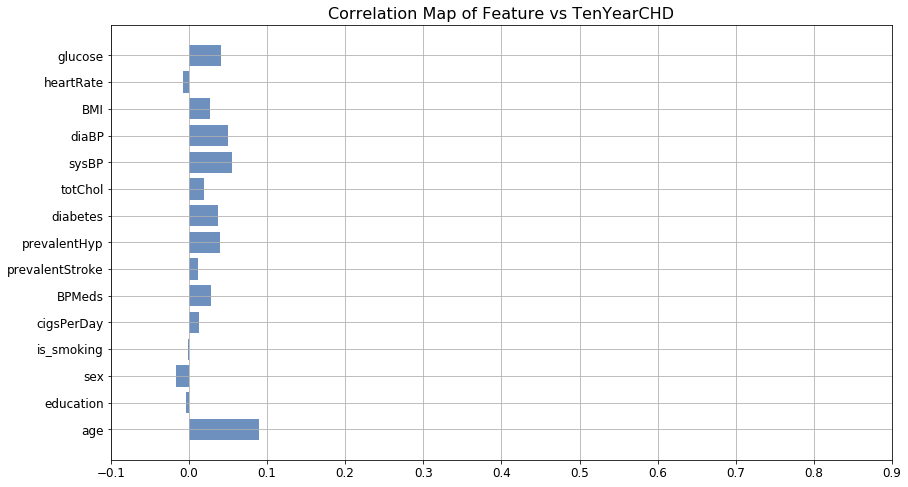

In [38]:
#Create correlation map
corrmat=corr_data.corr()

#Create horizontal bar plot of correlation
from matplotlib.pyplot import figure
figure(figsize=(14,8))
plt.barh(corr_data.columns[:-1],corrmat["TenYearCHD"][:-1], color='#6e90bf')
plt.tick_params(labelsize=12)
plt.xticks(np.arange(-0.1, 1, 0.1))
plt.title('Correlation Map of Feature vs TenYearCHD', fontsize=16)
plt.grid(True)
plt.rc('grid', linestyle="-", color='black')



#save plot as image
plt.savefig(r'images/correlation_barplot.png', dpi=400)

plt.show()

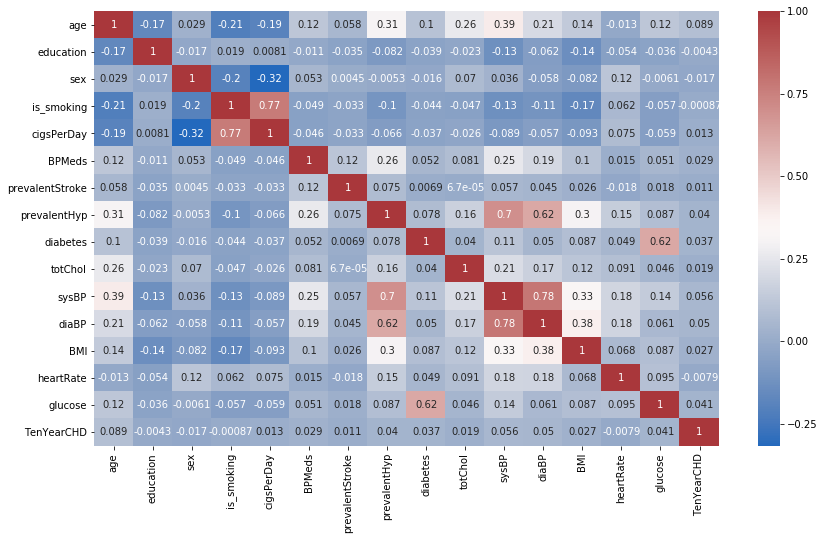

In [39]:
#Create a heatmap of the data
figure(figsize=(14,8))
sns.heatmap(corr_data.corr(), annot=True, cmap='vlag')

#save plot as image
plt.savefig(r'images/correlation_heatmap.png', dpi=400)


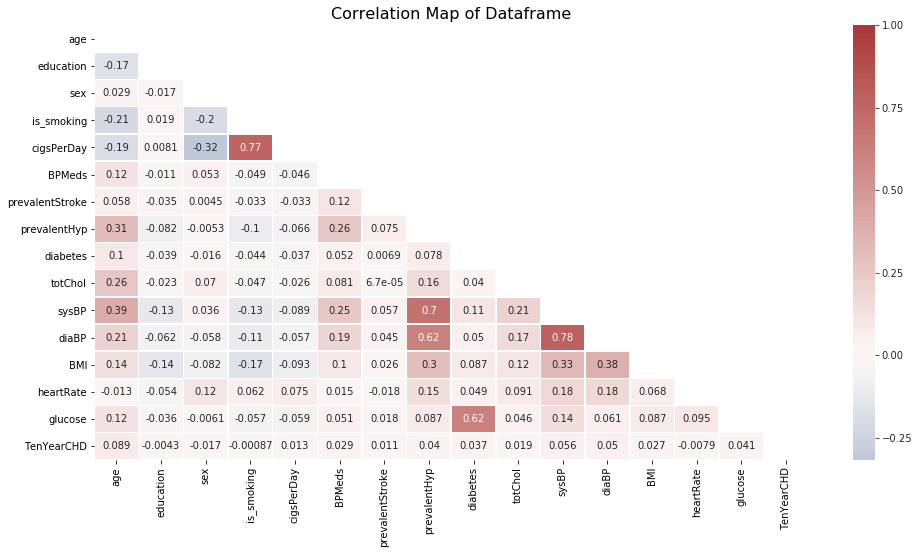

In [40]:
#define variable to be plotted
corrmat=corr_data.corr()

f,ax = plt.subplots(figsize=(16,8))

#define masked area of heatmap
mask = np.zeros_like(corrmat) # returns numpy array identical in shape to corrmat, filled with zeros
mask[np.triu_indices_from(mask)] = True # takes mask and changes the triangle above the diagonal to 1

#plot heatmap, applying the mask, reversing the order of rows and columns for display purposes
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat, center = 0, linewidths=.5, mask=mask, cmap='vlag', annot=True)
    plt.title('Correlation Map of Dataframe', fontsize=16)
    
#save plot as image
plt.savefig(r'images/correlation_heatmap_diagonal.png', dpi=400, bbox_inches='tight')


Some obvious (and even expected) relationships pop out here. Unsurprisingly, blood glucose and presence of diabetes are closely related, as are systolic and diastolic blood pressure. The strongest factor in predicting CHD is age, followed by blood pressure and consequently blood pressure medication, preexisting conditions (diabetes, stroke, obesity), and prevalence of smoking. 


###  Kernel Density Estimation  (KDE)
Alternatively, correlation can be visualized by plotting distribution plots to show the influence of each feature on the predicted value (risk of developing cardiovascular heart disease in the next 10 years). To do this, each feature will be plotted using a Kernel Density Estimation (KDE).

The KDE shows the non-parametric probability density function of each data feature. This plot is created for each scneario - one for cases where CHD is observed, and a second for cases in which CHD is not observed. The amount of overlap of each density function is then compared to determine correlation. 

If there is a high overlap of both density functions for the feature, it is implied that there is little to no correlation between the dependent(CHD) and independent(each feature) variables.  The less overlap between plots, the more significant the correlations. 

For those variables that are discrete, each category will have 2 plots. For example, when looking at the KDE for gender, there are 4 curves. To determine correlation one must compare the CHD curves for male, and then consider the CHD curves for female patients. The comparison for gender vs heart disease must be visualized using a different method.


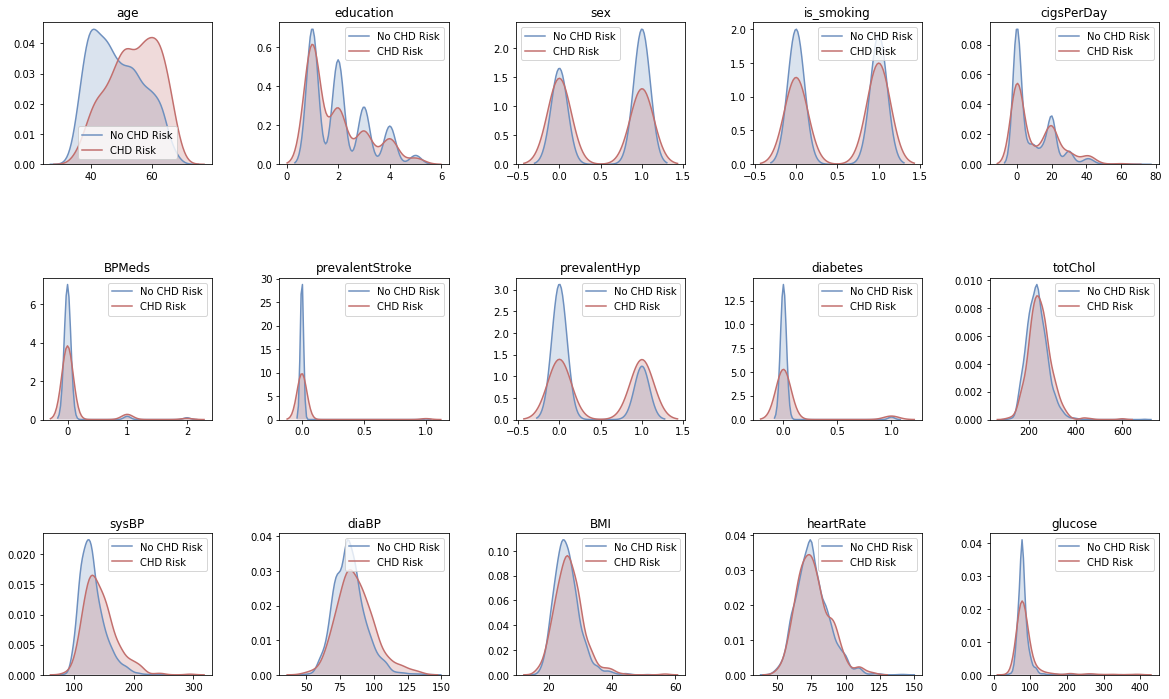

In [41]:
#Create dataframe for generation of KDE
kde_data = corr_data.copy()
kde_data.head()

#Eliminate Nan's
kde_data.education.fillna(5, inplace=True) #5= education unknown
kde_data.cigsPerDay.fillna(smkg.cigsPerDay.median(), inplace=True)  #replace unknown as median value for cigs per day
kde_data.BPMeds.fillna(2, inplace=True) #2= BP meds unknown
kde_data.totChol.fillna(kde_data.totChol.median(), inplace=True) #replace nan as median value
kde_data.BMI.fillna(kde_data.BMI.median(),inplace=True ) #replace nan as median value
kde_data.heartRate.fillna(kde_data.heartRate.median(),inplace=True ) #replace nan as median value
kde_data.glucose.fillna(kde_data.glucose.median(),inplace=True ) #replace nan as median value

#list column features separately of CHD risk
factors=list(kde_data.columns)[0:-1]

#Create Figure
fig, ax = plt.subplots(3,5, figsize=(20, 12))
plt.subplots_adjust(hspace=0.8, wspace=0.4)


#Create loop to plot each feature vs CHD risk as KDE
for i in range(len(factors)):
    plt.subplot(3,5,i+1)
    t=factors[i]
    sns.kdeplot(kde_data[t][kde_data.TenYearCHD==0], shade=True, label='No CHD Risk', color='#6e90bf')
    sns.kdeplot(kde_data[t][kde_data.TenYearCHD==1], shade=True, label='CHD Risk', color='#c26f6d')
    plt.title(t)



#save plot as image
plt.savefig(r'images/KDE5x3.png', dpi=400, bbox_inches='tight')

plt.show()

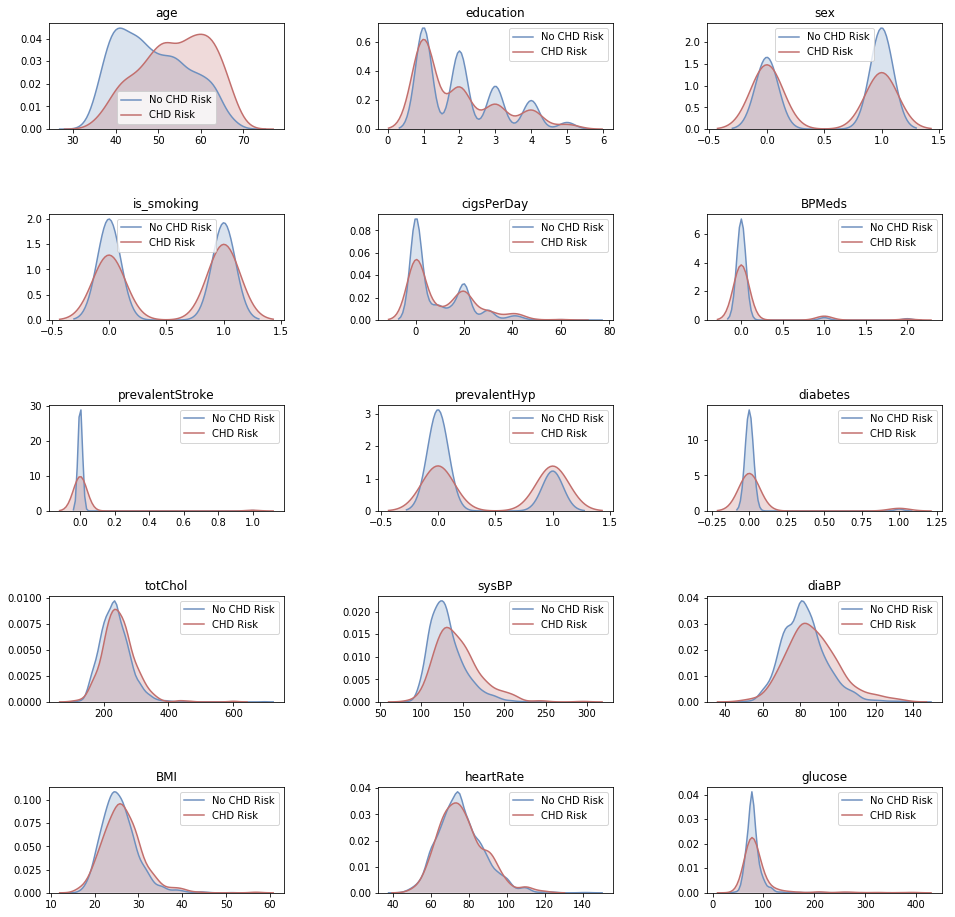

In [42]:
#Create dataframe for generation of KDE
kde_data = corr_data.copy()
kde_data.head()

#Eliminate Nan's
kde_data.education.fillna(5, inplace=True) #5= education unknown
kde_data.cigsPerDay.fillna(smkg.cigsPerDay.median(), inplace=True)  #replace unknown as median value for cigs per day
kde_data.BPMeds.fillna(2, inplace=True) #2= BP meds unknown
kde_data.totChol.fillna(kde_data.totChol.median(), inplace=True) #replace nan as median value
kde_data.BMI.fillna(kde_data.BMI.median(),inplace=True ) #replace nan as median value
kde_data.heartRate.fillna(kde_data.heartRate.median(),inplace=True ) #replace nan as median value
kde_data.glucose.fillna(kde_data.glucose.median(),inplace=True ) #replace nan as median value

#list column features separately of CHD risk
factors=list(kde_data.columns)[0:-1]

#Create Figure
fig, ax = plt.subplots(5,3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.8, wspace=0.4)


#Create loop to plot each feature vs CHD risk as KDE
for i in range(len(factors)):
    plt.subplot(5,3,i+1)
    t=factors[i]
    sns.kdeplot(kde_data[t][kde_data.TenYearCHD==0], shade=True, label='No CHD Risk', color='#6e90bf')
    sns.kdeplot(kde_data[t][kde_data.TenYearCHD==1], shade=True, label='CHD Risk', color='#c26f6d')
    plt.title(t)



#save plot as image
plt.savefig(r'images/KDE3x5.png', dpi=400, bbox_inches='tight')

plt.show()

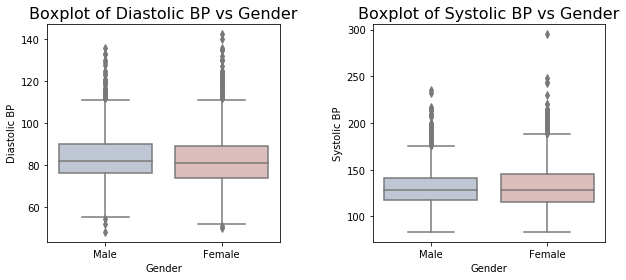

In [43]:
#Create plot of BP vs gender
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

#Plot Diastolic BP vs Gender
plt.subplot(1,2,1)
a = sns.boxplot(x='sex',y='diaBP',data=corr_data, palette = 'vlag')
a.set(xlabel='Gender', ylabel='Diastolic BP')
a.set_xticklabels(['Male','Female'])
plt.title('Boxplot of Diastolic BP vs Gender',fontsize=16)

#Plot Systolic BP vs Gender
plt.subplot(1,2,2)
b = sns.boxplot(x='sex',y='sysBP',data=corr_data, palette = 'vlag')
b.set(xlabel='Gender', ylabel='Systolic BP')
b.set_xticklabels(['Male','Female'])
plt.title('Boxplot of Systolic BP vs Gender' ,fontsize=16)

#save plot as image
plt.savefig(r'images/BPvsGenderBoxplot.png', dpi=400)

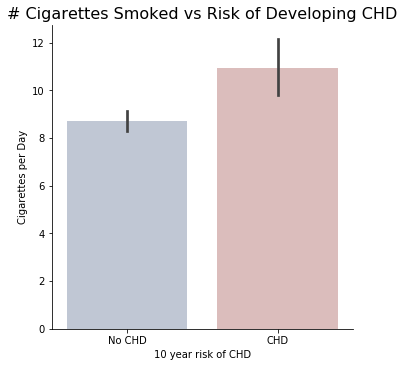

In [44]:
#Amount of cigarettes smoked affect on CHD risk 
smokingvsCHD = sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=train_original, palette= 'vlag')
smokingvsCHD.set(xlabel='10 year risk of CHD', ylabel='Cigarettes per Day')
smokingvsCHD.set_xticklabels(['No CHD','CHD'])
plt.title('# Cigarettes Smoked vs Risk of Developing CHD' ,fontsize=16)

#save plot as image
plt.savefig(r'images/cigsvsCHD_catplot.png', dpi=400, bbox_inches='tight')

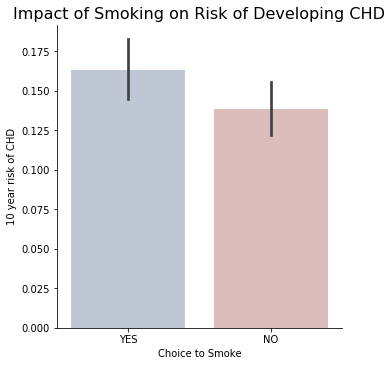

In [45]:
#Effect of smoking on risk of developing CHD
smokingvsCHD = sns.catplot(x='is_smoking',y='TenYearCHD',kind='bar',data=train_original, palette= 'vlag')
smokingvsCHD.set(xlabel='Choice to Smoke', ylabel='10 year risk of CHD')
plt.title('Impact of Smoking on Risk of Developing CHD' ,fontsize=16)

#save plot as image
plt.savefig(r'images/smokingvsCHD_catplot.png', dpi=400, bbox_inches='tight')

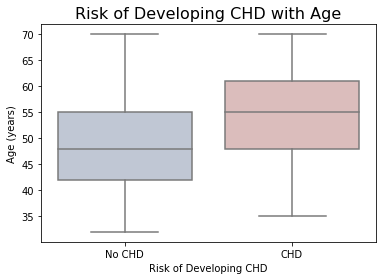

In [46]:
#Effect of age on developing CHD
age = sns.boxplot(x='TenYearCHD',y='age',data=train_original, palette='vlag')
age.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
age.set_xticklabels(['No CHD','CHD'])
plt.title('Risk of Developing CHD with Age' ,fontsize=16)

#save plot as image
plt.savefig(r'images/agevsCHD_boxplot.png', dpi=400)

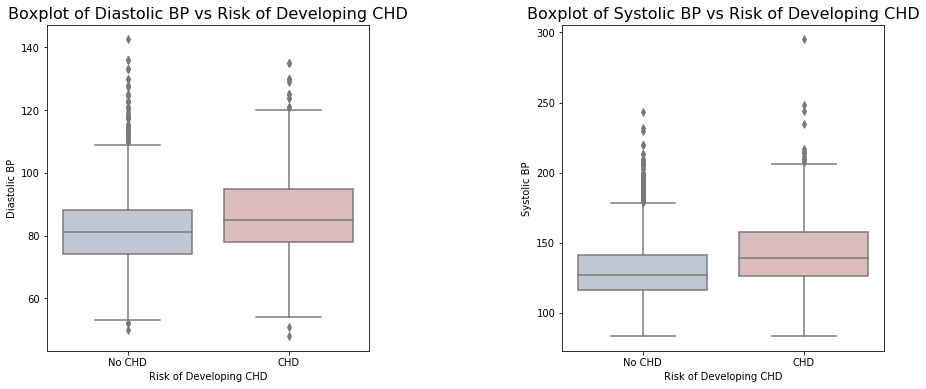

In [47]:
#Create plot of BP vs CHD
fig, ax = plt.subplots(1,2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.6)

#Plot Diastolic BP vs CHD
plt.subplot(1,2,1)
a = sns.boxplot(x='TenYearCHD',y='diaBP',data=train_original, palette = 'vlag')
a.set(xlabel='Risk of Developing CHD', ylabel='Diastolic BP')
a.set_xticklabels(['No CHD','CHD'])
plt.title('Boxplot of Diastolic BP vs Risk of Developing CHD',fontsize=16)

#Plot Systolic BP vs Gender
plt.subplot(1,2,2)
b = sns.boxplot(x='TenYearCHD',y='sysBP',data=train_original, palette = 'vlag')
b.set(xlabel='Risk of Developing CHD', ylabel='Systolic BP')
b.set_xticklabels(['No CHD','CHD'])
plt.title('Boxplot of Systolic BP vs Risk of Developing CHD' ,fontsize=16)


#save plot as image
plt.savefig(r'images/BPsvsCHD_boxplot.png', dpi=400)

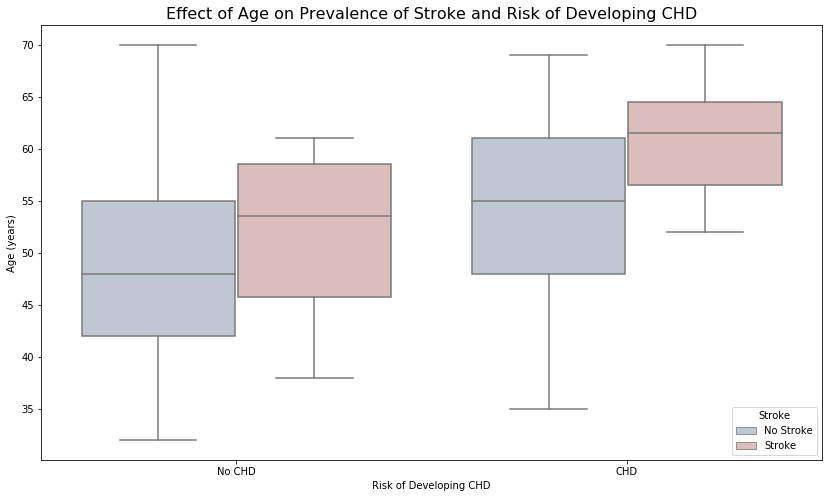

In [48]:
figure(figsize=(14,8))
stroke = sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=train_original, palette = 'vlag')
stroke.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
stroke.set_xticklabels(['No CHD','CHD'])

# check axes and find which is have legend
leg = stroke.axes.get_legend()
leg.set_title('Stroke')
new_labels = ['No Stroke', 'Stroke']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#Set plot title
plt.title('Effect of Age on Prevalence of Stroke and Risk of Developing CHD' ,fontsize=16)

#save plot as image
plt.savefig(r'images/AGE_STROKEvsCHD_boxplot.png', dpi=400)

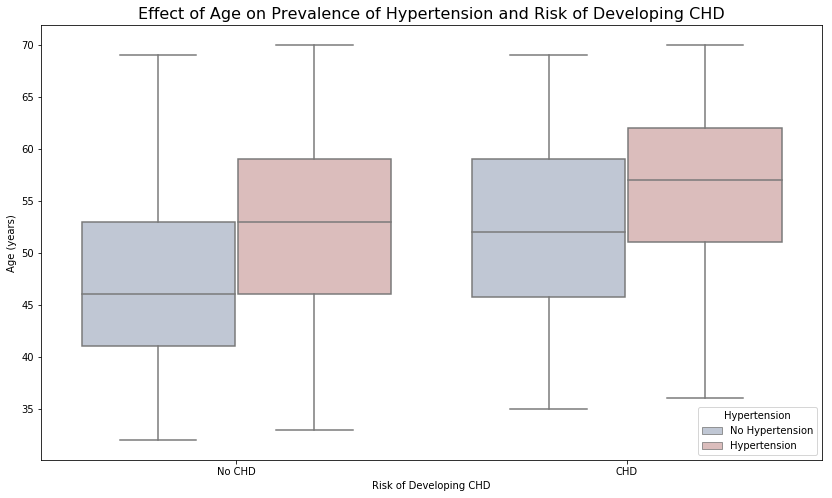

In [49]:
figure(figsize=(14,8))
hyp = sns.boxplot(x='TenYearCHD',y='age',hue='prevalentHyp',data=train_original, palette = 'vlag')
hyp.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
hyp.set_xticklabels(['No CHD','CHD'])

# check axes and find which is have legend
leg = hyp.axes.get_legend()
leg.set_title('Hypertension')
new_labels = ['No Hypertension', 'Hypertension']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#Set plot title
plt.title('Effect of Age on Prevalence of Hypertension and Risk of Developing CHD' ,fontsize=16)

#save plot as image
plt.savefig(r'images/AGE_HYPERTENSIONvsCHD_boxplot.png', dpi=400)

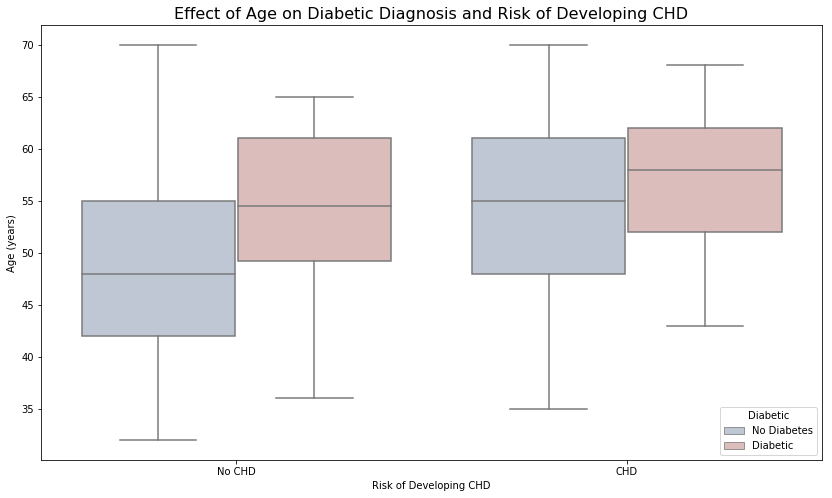

In [50]:
figure(figsize=(14,8))
diab = sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=train_original, palette = 'vlag')
diab.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
diab.set_xticklabels(['No CHD','CHD'])

# check axes and find which is have legend
leg = diab.axes.get_legend()
leg.set_title('Diabetic')
new_labels = ['No Diabetes', 'Diabetic']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#Set plot title
plt.title('Effect of Age on Diabetic Diagnosis and Risk of Developing CHD' ,fontsize=16)

#save plot as image
plt.savefig(r'images/AGE_DIABETESvsCHD_boxplot.png', dpi=400)

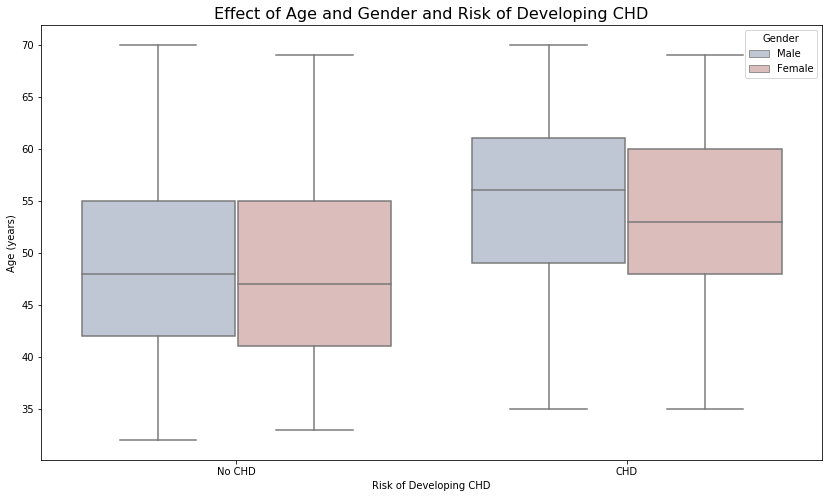

In [51]:
figure(figsize=(14,8))
diab = sns.boxplot(x='TenYearCHD',y='age',hue='sex',data=train_original, palette = 'vlag')
diab.set(xlabel='Risk of Developing CHD', ylabel='Age (years)')
diab.set_xticklabels(['No CHD','CHD'])

# check axes and find which is have legend
leg = diab.axes.get_legend()
leg.set_title('Gender')
new_labels = ['Male', 'Female']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#Set plot title
plt.title('Effect of Age and Gender and Risk of Developing CHD' ,fontsize=16)


#save plot as image
plt.savefig(r'images/AGE_GENDERvsCHD_boxplot.png', dpi=400)

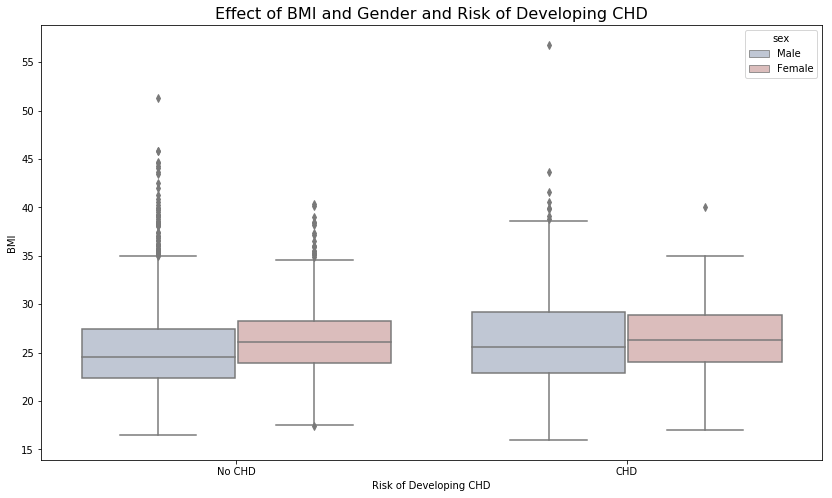

In [52]:
figure(figsize=(14,8))
bmi = sns.boxplot(x='TenYearCHD',y='BMI',hue='sex',data=train_original, palette = 'vlag')
bmi.set(xlabel='Risk of Developing CHD', ylabel='BMI')
bmi.set_xticklabels(['No CHD','CHD'])

# check axes and find which is have legend
leg = bmi.axes.get_legend()
bmi.set_title('Gender')
new_labels = ['Male', 'Female']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#Set plot title
plt.title('Effect of BMI and Gender and Risk of Developing CHD' ,fontsize=16)


#save plot as image
plt.savefig(r'images/BMI_GENDERvsCHD_boxplot.png', dpi=400)

# Statistical Testing

Let's now move on to statistical testing. Statistical analysis will be conducted to perform high level hypothesis testing on each of the variables in the dataset. This will be to verify the correlation relationships shown in the heatmap above, and will also serve to validate/verify findings from the Framingham Heart Study reported by reasearchers.  Two types of statistical testing will be conducted, Chi-Squared testing and T-testing, based upon variable type. 


## Hypothesis Testing: Chi-Squared

Chi-Squared testing is used in situations when testing statistical independence or associaton between categorical variables. The following categorical variables will be tested using this method: 
- Education level
- Gender
- Choice to Smoke
- Use of Blood Pressure Medication
- Prevalence of Stroke
- Prevalence of Hypertension

Hypothesis testing for discrete variables will have hypotheses set up as follows: 

$H_{o}$ :  There's no association between the feature and risk of developing CHD (they are indepdendent). 

$H_{a}$ :  There is an association between the feature and risk of developing CHD (they are dependent). 

In [53]:
#Define function for quick Chi-squared testing
def chi2_quick(var1 , var2, alpha, varname):
    #Build contingency table
    test_table = pd.crosstab(var1, var2)
    
    #run test and print results
    chi2, p, dof, ex = scipy.stats.chi2_contingency(test_table,correction=False)
    print("Chi-Squared Value: " + chi2.astype(str))
    print("P-value:           " + p.astype(str))
    
    #analyze hypothesis test results
    if p-alpha > 0:
        print('Fail to reject the null hypothesis.', varname, 'has no effect on risk of developing CHD.')
    else:
        print('Reject the null hypothesis.', varname, 'has an effect on risk of developing CHD.' )

In [54]:
#Compare Education Level to Risk of Heart Disease 
chi2_quick(corr_data.education,corr_data.TenYearCHD,0.05,'Education Level')

Chi-Squared Value: 24.16519112406638
P-value:           0.0004869488182817257
Reject the null hypothesis. Education Level has an effect on risk of developing CHD.


In [55]:
#Compare Gender to Risk of Heart Disease 
chi2_quick(corr_data.sex,corr_data.TenYearCHD,0.05, 'Gender')

Chi-Squared Value: 25.200290969556484
P-value:           3.3715246929346204e-06
Reject the null hypothesis. Gender has an effect on risk of developing CHD.


In [56]:
#Compare Choice to smoke to Risk of Heart Disease 
chi2_quick(corr_data.is_smoking,corr_data.TenYearCHD,0.05, 'Choice to smoke')

Chi-Squared Value: 4.801203632395231
P-value:           0.09066337418065154
Fail to reject the null hypothesis. Choice to smoke has no effect on risk of developing CHD.


In [57]:
#Compare use of BP meds to Risk of Heart Disease 
chi2_quick(corr_data.BPMeds,corr_data.TenYearCHD,0.05, 'Use of BP meds')

Chi-Squared Value: 26.179073806821595
P-value:           2.0667424138072174e-06
Reject the null hypothesis. Use of BP meds has an effect on risk of developing CHD.


In [58]:
#Compare prevalence of stroke to Risk of Heart Disease 
chi2_quick(corr_data.prevalentStroke,corr_data.TenYearCHD,0.05, 'Prevalence of stroke')

Chi-Squared Value: 18.561759303220587
P-value:           9.318911344640954e-05
Reject the null hypothesis. Prevalence of stroke has an effect on risk of developing CHD.


In [59]:
#Compare prevalence of hypertension to Risk of Heart Disease 
chi2_quick(corr_data.prevalentHyp,corr_data.TenYearCHD,0.05,'Prevalence of Heart Disease')

Chi-Squared Value: 96.65477624832519
P-value:           1.0272638678977078e-21
Reject the null hypothesis. Prevalence of Heart Disease has an effect on risk of developing CHD.


In [60]:
#Compare prevalence of diabetes to Risk of Heart Disease 
chi2_quick(corr_data.diabetes,corr_data.TenYearCHD,0.05, 'Prevalence of Diabetes')

Chi-Squared Value: 36.366445688463195
P-value:           1.2680216116030407e-08
Reject the null hypothesis. Prevalence of Diabetes has an effect on risk of developing CHD.


## Hypothesis Testing: T-Test

T-testing is used to compare the means between groups of continuous data. This method was chosen rather than ANOVA because only two groups of data are being compared to determine if they are different. The response variables that will be tested using this method are continuous. 

These variables include: 
- Age
- Number of Cigarettes Smoked per Day
- Total Cholesterol
- Blood Pressure (both systolic and diastolic)
- BMI
- Heart Rate
- Blood Glucose


$H_{o}$ :  Patients of each group have the same risk of developing heart disease, on average.

$H_{a}$ :  Patients of of each group do not have the same risk of developing heart disease, on average.

In [61]:
def t_test(var1, var2, alpha, varname):
    # Use scipy.stats.ttest_ind.
    t, p = scipy.stats.ttest_ind(var1, var2, equal_var=False)
    
    print("ttest_ind:            t = %g  p = %g" % (t, p))
    
    #analyze hypothesis test results
    #interperet the critical value 
    if p > alpha :
        print('Fail to reject the null hypothesis.', varname, 'has no effect on risk of developing CHD.')
    else:
        print('Reject the null hypothesis.', varname, 'has an effect on risk of developing CHD.' )

In [62]:
#Define dataframes to compare means between each outcome
CHD = corr_data[corr_data.TenYearCHD == 0]
noCHD = corr_data[corr_data.TenYearCHD == 1]

kde_CHD = kde_data[corr_data.TenYearCHD == 0]
kde_noCHD = kde_data[corr_data.TenYearCHD == 1]

In [63]:
#T-Test for Age
t_test(CHD.age,noCHD.age,0.05,"Age")

ttest_ind:            t = -13.7714  p = 1.84555e-38
Reject the null hypothesis. Age has an effect on risk of developing CHD.


In [64]:
#T- Test for # Cigarettes Smoked per Day
t_test(kde_CHD.cigsPerDay,kde_noCHD.cigsPerDay,0.05,"# of Cigarettes smoked per day")

ttest_ind:            t = -3.47877  p = 0.000536802
Reject the null hypothesis. # of Cigarettes smoked per day has an effect on risk of developing CHD.


In [65]:
#T- Test for Total Cholesterol
t_test(kde_CHD.totChol,kde_noCHD.totChol,0.05,"Total Cholesterol")

ttest_ind:            t = -5.0646  p = 5.31085e-07
Reject the null hypothesis. Total Cholesterol has an effect on risk of developing CHD.


In [66]:
#T- Test for Systolic BP
t_test(CHD.sysBP,noCHD.sysBP,0.05,"Systolic Blood Pressure")

ttest_ind:            t = -10.5345  p = 5.51533e-24
Reject the null hypothesis. Systolic Blood Pressure has an effect on risk of developing CHD.


In [67]:
#T- Test for Diastolic BP
t_test(CHD.diaBP,noCHD.diaBP,0.05,"Diastolic Blood Pressure")

ttest_ind:            t = -6.95276  p = 8.89528e-12
Reject the null hypothesis. Diastolic Blood Pressure has an effect on risk of developing CHD.


In [68]:
#T- Test for BMI
t_test(kde_CHD.BMI,kde_noCHD.BMI,0.05,"BMI")

ttest_ind:            t = -3.52887  p = 0.000446438
Reject the null hypothesis. BMI has an effect on risk of developing CHD.


In [69]:
#T- Test for heart rate
t_test(kde_CHD.heartRate,kde_noCHD.heartRate,0.05,"Resting heart rate")

ttest_ind:            t = -1.15895  p = 0.246873
Fail to reject the null hypothesis. Resting heart rate has no effect on risk of developing CHD.


In [70]:
#T- Test for glucose
t_test(kde_CHD.glucose,kde_noCHD.glucose,0.05,"Resting heart rate")

ttest_ind:            t = -4.69331  p = 3.40371e-06
Reject the null hypothesis. Resting heart rate has an effect on risk of developing CHD.


## Results of Statistical Testing 

As expected, there was a correlation and a relationship observed and proved via hypothesis testing between blood pressure, preexisting medical conditions, age, and risk of developing CHD. Data shows that as a person ages, they are at higher risk of developing CHD, which is not unexpected. Particularly since, for most people, health declines with age. 

Surprisingly, there was a correlation between smoking and risk of developing CHD, but only when looking at the amount of cigarettes smoked per day. Knowing only whether or not a person smokes is not enough to be a significant predictor of risk.

Overall statistical results are summarized in the table below: 

![alt text](Images/StatisticalResultsTable.png "Final Statistical Scores")


## Final Comments 

As expected, ability to predict risk of developing CHD is based on many factors and is not easily predicted. 
However, there are clear relationships present, so development of a machine learning model and predictor for the client is possible and within reason. 

Of note, many of the findings when studying this data set are consistent with known facts about CHD. 
 - Smoking is likely to increase the risk of developing CHD. 
 - Cholesterol and blood sugar are likely to increase the risk of CHD. 
 - Overall health and well being (stroke, hypertension, blood sugar, body weight) play a role in heart health. 
 - Risk of heart disease increases with age. 